In [1]:
from tensorchem.dataset.molecule import MoleculeSet as MSet
import glob
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
msets = []
mset_natoms = []
mset_elements = []

In [3]:
for mol in glob.glob("/mnt/sdb1/jeherr/chemspider_data/expanded_msets/meta/*.mset")+glob.glob("/mnt/sdb1/jeherr/chemspider_data/expanded_msets/aimd/*.mset"):
    mset = MSet()
    mset.filename = mol
    try:
        mset.load()
        repeat = False
        for prev_mset in msets:
            if mset.is_isomer(prev_mset):
                repeat = True 
        if repeat is False:
            msets.append(mset)
            mset_natoms.append(mset.n_atoms)
            mset_elements.append(mset.elements)
    except json.JSONDecodeError:
        pass

In [5]:
print("Total number of unique molecules: ", len(msets))

Total number of unique molecules:  3025


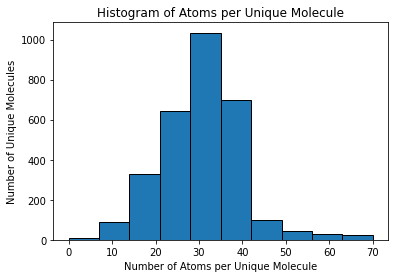

In [7]:
plt.hist(mset_natoms, edgecolor='k', range=[0,70])
plt.xlabel("Number of Atoms per Unique Molecule")
plt.ylabel("Number of Unique Molecules")
plt.title('Histogram of Atoms per Unique Molecule')
plt.show()